In [51]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [52]:
train_dataset = MNIST(root = 'data/', download = True)

In [53]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [54]:
len(train_dataset)

60000

In [55]:
test_dataset = MNIST(root = 'data/', train = False)
len(test_dataset)

10000

In [56]:
train_dataset[0]
#it is the image 28X28 represent the number 5

(<PIL.Image.Image image mode=L size=28x28>, 5)

label:  5


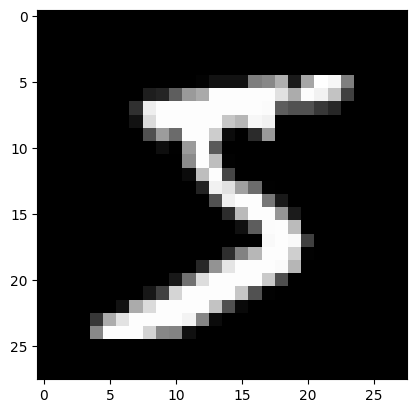

In [57]:
# visualizing the image

import matplotlib.pyplot as plt
image, label = train_dataset[0]
plt.imshow(image, cmap = 'gray')
print('label: ', label)

label:  3


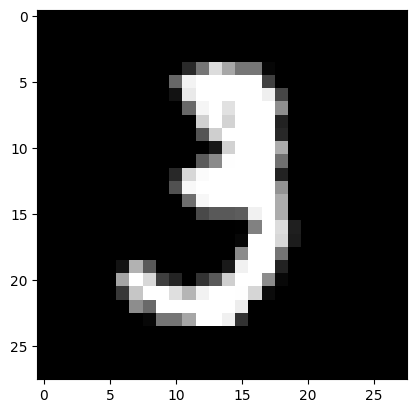

In [58]:
image, label = train_dataset[10]
plt.imshow(image, cmap = 'gray')
print('label: ', label)

**NOTE:**

Pytorch does not know how to work with thw images, so we will convert the images to tensoers

In [59]:
import torchvision.transforms as transforms

In [60]:
train_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor() )

In [61]:
image_tensor, label = train_dataset[0]
print(image_tensor.shape)

torch.Size([1, 28, 28])


In [62]:
print(image_tensor[:, 15:20, 15:20]) # we are seeing particular part of the image

tensor([[[0.7294, 0.9922, 0.9922, 0.5882, 0.1059],
         [0.0627, 0.3647, 0.9882, 0.9922, 0.7333],
         [0.0000, 0.0000, 0.9765, 0.9922, 0.9765],
         [0.5098, 0.7176, 0.9922, 0.9922, 0.8118],
         [0.9922, 0.9922, 0.9922, 0.9804, 0.7137]]])


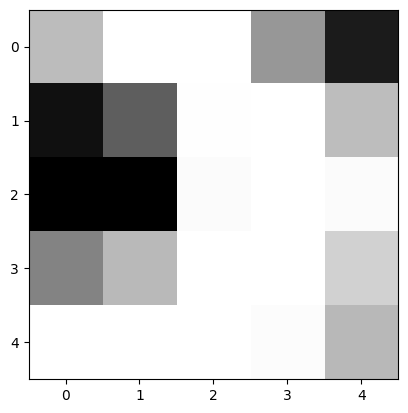

In [63]:
plt.imshow(image_tensor[0, 15:20, 15:20], cmap = 'gray')

# Training and Validation Datasets
While building real world machine learning models, it is quite common to split the dataset into 3 parts:
1. **Training set** used to train the model l.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In the MNIST dataset, there are 60,000 training images, and 10,000 test images. The test set is standardized so that different researchers can report the results of their models against the same set of images.
Since there's no predefined validation set, we must manually split the 60,000 Images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [64]:
from torch.utils.data import random_split, DataLoader

train_dataset, val_dataset =  random_split(train_dataset, [50000, 10000])

In [65]:
print(len(train_dataset))
print(len(val_dataset))


50000
10000


In [66]:
batch_size = 128
train_Loader = DataLoader(train_dataset, batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size, shuffle =False)